In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

#### Getting data from different sources

In [4]:
df1=pd.read_csv("PreProcessedData.csv", encoding='ISO-8859-1', usecols=['text', 'Ground Label'])
df1.head()

,text,Ground Label
0,"It s hard to believe, but Donald Trump does ha...",fake
1,bankensektor Der russische Staat werde die Ban...,fake
2,A member of the House Intelligence Committee i...,fake
3,WASHINGTON (Reuters) - House of Representative...,true
4,WASHINGTON (Reuters) - U.S. President Donald T...,true


In [5]:
df2=pd.read_csv("data.csv", encoding='ISO-8859-1', usecols=['Body', 'Label'])
df2.head()

,Body,Label
0,Image copyright Getty Images\nOn Sunday mornin...,1
1,"LONDON (Reuters) - âLast Flag Flyingâ, a c...",1
2,The feud broke into public view last week when...,1
3,MEXICO CITY (Reuters) - Egyptâs Cheiron Hold...,1
4,"Country singer Jason Aldean, who was performin...",1


In [7]:
df1.shape, df2.shape

((69045, 2), (4009, 2))

#### Data Preprocessing

In [8]:
df1=df1.rename(columns={'Ground Label':'label'})
df2=df2.rename(columns={'Body':'text', 'Label':'label'})

In [9]:
df=pd.concat((df1, df2))
df.head()

,text,label
0,"It s hard to believe, but Donald Trump does ha...",fake
1,bankensektor Der russische Staat werde die Ban...,fake
2,A member of the House Intelligence Committee i...,fake
3,WASHINGTON (Reuters) - House of Representative...,true
4,WASHINGTON (Reuters) - U.S. President Donald T...,true


In [10]:
df.shape

(73054, 2)

In [11]:
df.isnull().sum()

text     88
label     0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.isnull().any()

text     False
label    False
dtype: bool

In [14]:
df['label']=np.where(df['label']=='fake', 1, 0)
df.head()

,text,label
0,"It s hard to believe, but Donald Trump does ha...",1
1,bankensektor Der russische Staat werde die Ban...,1
2,A member of the House Intelligence Committee i...,1
3,WASHINGTON (Reuters) - House of Representative...,0
4,WASHINGTON (Reuters) - U.S. President Donald T...,0


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.index

RangeIndex(start=0, stop=72966, step=1)

In [17]:
df['label'].unique()

array([1, 0])

In [18]:
df.label.value_counts()

1    42096
0    30870
Name: label, dtype: int64

In [19]:
print("Data has {}% fake news".format(np.round((df[df['label']==1]['text'].count()/len(df)*100),2)))

Data has 57.69% fake news


In [20]:
df.head(20)

,text,label
0,"It s hard to believe, but Donald Trump does ha...",1
1,bankensektor Der russische Staat werde die Ban...,1
2,A member of the House Intelligence Committee i...,1
3,WASHINGTON (Reuters) - House of Representative...,0
4,WASHINGTON (Reuters) - U.S. President Donald T...,0
5,Originally appeared at The American Conservati...,1
6,(Reuters) - President Donald Trumpâs nominee...,0
7,This yearâs Clarivate Analytics Roadshow too...,0
8,BERLIN (Reuters) - The travel restrictions put...,0
9,This condition is only possible with criminall...,1


#### working on text cleaning

In [21]:
def clean_text(data):
        import re
        rem1=r'#[A-Za-z0-9]+'
        rem2=r'@[A-Za-z0-9]+'
        rem3=r'https?://[A-Za-z0-9./]+'
        pair=r'|'.join((rem1,rem2,rem3))
        strip=re.sub(pair,'', data)
        letters_only=re.sub('[^a-zA-Z]', ' ',strip)
        lower_case=letters_only.lower()
    
        from nltk.tokenize import TreebankWordTokenizer
        token = TreebankWordTokenizer()
        word=token.tokenize(lower_case)  
        return (' '.join(word))

In [22]:
clean_tweets=[]
for i in range(0, df['text'].shape[0]):
    clean_tweets.append(clean_text(df['text'][i]))
print('Parsing is completed')

Parsing is completed


In [23]:
clean_df=pd.DataFrame(clean_tweets , columns=['text'])
clean_df.head()

,text
0,it s hard to believe but donald trump does hav...
1,bankensektor der russische staat werde die ban...
2,a member of the house intelligence committee i...
3,washington reuters house of representatives re...
4,washington reuters u s president donald trump ...


In [24]:
clean_df['label']=df['label']

In [25]:
clean_df

,text,label
0,it s hard to believe but donald trump does hav...,1
1,bankensektor der russische staat werde die ban...,1
2,a member of the house intelligence committee i...,1
3,washington reuters house of representatives re...,0
4,washington reuters u s president donald trump ...,0
...,...,...
72961,vietnam is in great danger you must publish an...,0
72962,trends to watch of readers think this story is...,0
72963,trump jr is soon to give a minute speech for o...,0
72964,shanghai reuters china said it plans to accept...,0


#### Working on train and validation set

In [26]:
import pickle

In [27]:
x=clean_df['text']
y=clean_df['label']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.20, random_state=22, shuffle=True)

In [29]:
# using TfidfVectorizer (does both in a pipeline -- Vectorizor + Tf-idf)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

In [31]:
x_train_df=vect.fit_transform(x_train)

In [32]:
x_test_df=vect.transform(x_test)

In [53]:
#dumping object in pickle

pickle.dump(vect, open('vect_text.pkl', 'wb'))

#### Working on ML models

* MultinomialNB

In [33]:
from sklearn.naive_bayes import MultinomialNB
bayes=MultinomialNB(alpha=1.5)
bayes.fit(x_train_df, y_train)

MultinomialNB(alpha=1.5)

In [34]:
y_pred_train=bayes.predict(x_train_df)

In [35]:
y_pred=bayes.predict(x_test_df)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      6207
           1       0.82      0.96      0.88      8387

    accuracy                           0.85     14594
   macro avg       0.87      0.83      0.84     14594
weighted avg       0.86      0.85      0.85     14594



In [59]:
mean_absolute_error(y_train,y_pred_train)

0.13996436647707805

In [60]:
mean_absolute_error(y_test,y_pred)

0.1493764560778402

In [38]:
conf=confusion_matrix(y_test, y_pred, labels=[1,0])

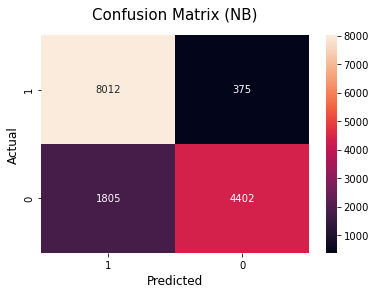

In [39]:
sns.heatmap(pd.DataFrame(conf), annot=True, fmt='g')
plt.title("Confusion Matrix (NB)", y=1.05, fontsize='15')
plt.xlabel('Predicted', fontsize='12')
plt.ylabel('Actual', fontsize='12')
plt.xticks([0.5,1.5],[1,0])
plt.yticks([0.5,1.5],[1,0]);

* KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_df,y_train)

KNeighborsClassifier()

In [64]:
y_predk_train=knn.predict(x_train_df)

In [41]:
y_predk=knn.predict(x_test_df)

In [66]:
mean_absolute_error(y_train,y_predk_train)

0.22409716987596792

In [67]:
mean_absolute_error(y_test,y_pred) #overfitting

0.1493764560778402

In [42]:
print(classification_report(y_test,y_predk))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57      6207
           1       0.69      0.95      0.80      8387

    accuracy                           0.73     14594
   macro avg       0.77      0.69      0.68     14594
weighted avg       0.76      0.73      0.70     14594



In [43]:
confk=confusion_matrix(y_test, y_predk, labels=[1,0])

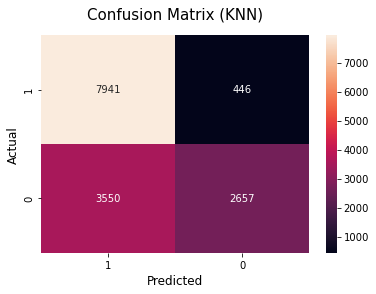

In [44]:
sns.heatmap(pd.DataFrame(confk), annot=True, fmt='g')
plt.title("Confusion Matrix (KNN)", y=1.05, fontsize='15')
plt.xlabel('Predicted', fontsize='12')
plt.ylabel('Actual', fontsize='12')
plt.xticks([0.5,1.5],[1,0])
plt.yticks([0.5,1.5],[1,0]);

* RF

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=20)
forest.fit(x_train_df, y_train)

RandomForestClassifier(n_estimators=20)

In [73]:
y_predf_train=forest.predict(x_train_df)

In [46]:
y_predf=forest.predict(x_test_df)

In [74]:
mean_absolute_error(y_train,y_predf_train)

0.024720756527102036

In [75]:
mean_absolute_error(y_test,y_predf)

0.10346717829244895

In [47]:
print(classification_report(y_test,y_predf))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      6207
           1       0.90      0.92      0.91      8387

    accuracy                           0.90     14594
   macro avg       0.90      0.89      0.89     14594
weighted avg       0.90      0.90      0.90     14594



In [48]:
conff=confusion_matrix(y_test, y_predf, labels=[1,0])

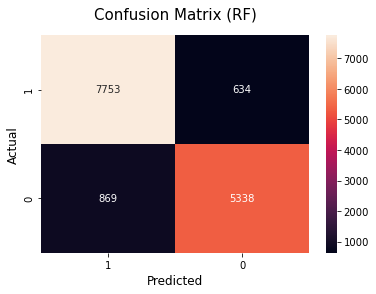

In [49]:
sns.heatmap(pd.DataFrame(conff), annot=True, fmt='g')
plt.title("Confusion Matrix (RF)", y=1.05, fontsize='15')
plt.xlabel('Predicted', fontsize='12')
plt.ylabel('Actual', fontsize='12')
plt.xticks([0.5,1.5],[1,0])
plt.yticks([0.5,1.5],[1,0]);

In [57]:
acc=pd.DataFrame({'Accuracy':[0.85,0.73,0.90]},index=['Naive Bayes', 'k-Nearest Neighbors', 'Random Forest' ])
acc

,Accuracy
Naive Bayes,0.85
k-Nearest Neighbors,0.73
Random Forest,0.90


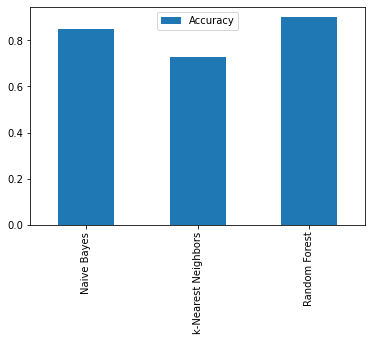

In [59]:
acc.plot(kind='bar');

In [60]:
mae=pd.DataFrame({'Mean Absolute Error':[0.1493,0.1493,0.1034]},index=['Naive Bayes', 'k-Nearest Neighbors', 'Random Forest' ])
mae

,Mean Absolute Error
Naive Bayes,0.1493
k-Nearest Neighbors,0.1493
Random Forest,0.1034


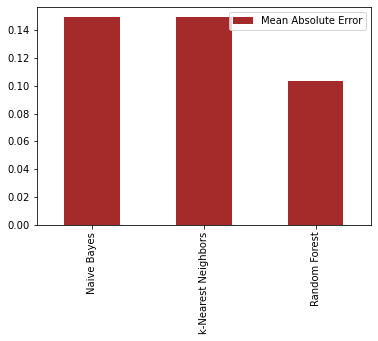

In [65]:
mae.plot(kind='bar', color='brown');

* Selecting RF for prediction
RECALL-improved
Accuracy- better than other
MAE-better than other

In [79]:
# dumping object in pickle

pickle.dump(forest, open('forest_text.pkl', 'wb'))

#### WordCloud

In [22]:
from wordcloud import WordCloud, STOPWORDS

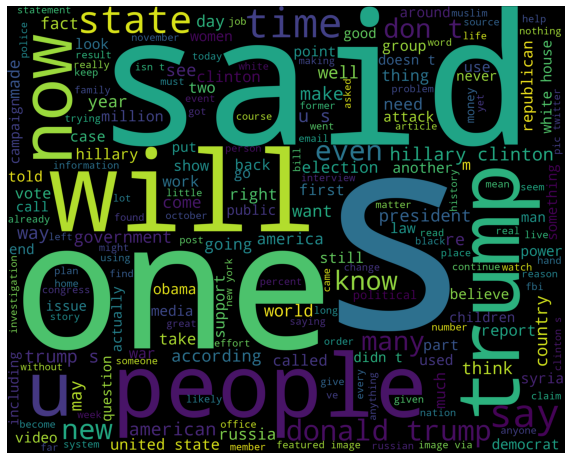

In [44]:
data_fake = clean_df[clean_df['label'] == 1].sample(5000)
#print(data_neg)
words = " ".join(data_fake['text'])

cleaned_words = " ".join([word for word in words.split() if 'http' not in word 
                               and not word.startswith('@') 
                               and not word.startswith('#') 
                               and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', 
                      width=2500, height=2000).generate(cleaned_words)


plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

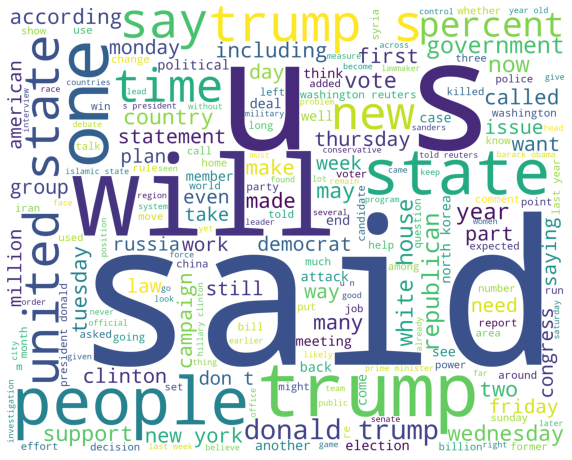

In [45]:
data_true = clean_df[clean_df['label'] == 0].sample(5000)
words = " ".join(data_true['text'])
cleaned_words = " ".join([word for word in words.split()
                               if 'http' not in word
                               and not word.startswith('@')
                               and not word.startswith('#')
                               and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=2500, height=2000).generate(cleaned_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

************************ rough ***************************************

### Procfile

A Procfile is a mechanism for declaring what commands are run by your application's containers on the Deis platform.
Here Heroku apps include a Procfile that specifies the commands that are executed by the app on startup.
You can use a Procfile to declare a variety of process types, including:

- Your app’s web server
- Multiple types of worker processes
- A singleton process, such as a clock
- Tasks to run before a new release is deployed

### gunicorn

The Gunicorn "Green Unicorn" is a Python Web Server Gateway Interface HTTP server. It is a pre-fork worker model, ported from Ruby's Unicorn project. The Gunicorn server is broadly compatible with a number of web frameworks, simply implemented, light on server resources and fairly fast.

### Pickle

“Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

### venv

virtualenv is used to manage Python packages for different projects. Using virtualenv allows you to avoid installing Python packages globally which could break system tools or other projects.

### Git

Git is the most commonly used version control system. Git tracks the changes you make to files, so you have a record of what has been done, and you can revert to specific versions should you ever need to. Git also makes collaboration easier, allowing changes by multiple people to all be merged into one source.

### .gitignore

The . gitignore file tells Git which files to ignore when committing your project to the GitHub repository. gitignore is located in the root directory of your repo.

#### Flask cannot communicate with Jupyter,It can communicate with py files.

In [176]:
x='hello @Ram,, How Are you?'

In [179]:
type(x)

str

In [191]:
clean=clean_text(df["Body"][5])

In [192]:
print(clean, type(clean))

jetnation fanduel league week of readers think this story is fact add your two cents before it s news our fanduel league is back again this week here are the details in total prize money to the winner to enter remember this is a one week league pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want click this link to enter you can discuss this with other ny jets fans on the jet nation message board or visit of on facebook source fanduel league week <class 'str'>


In [193]:
res=vect.transform(pd.Series(clean))

In [189]:
res

<1x38505 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [197]:
df["Body"][5]

"JetNation FanDuel League; Week 4\n% of readers think this story is Fact. Add your two cents.\n(Before It's News)\nOur FanDuel league is back again this week. Here are the details:\n$900 in total prize money. $250 to the winner. $10 to enter.\nRemember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.\nClick this link to enter â\x80\x94 http://fanduel.com/JetNation\nYou can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.\nSource: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/"

In [194]:
y_predk=knn.predict(res)

In [195]:
y_predk

array([0], dtype=int64)

In [198]:
df["Body"][8]

'Scott Pruitt, Administrator of the U.S. Environmental Protection Agency, answers a question during the Concordia Summit in Manhattan, New York, U.S., September 19, 2017. REUTERS/Jeenah Moon - RC1A105CB430\nWASHINGTON/NEW YORK (Reuters) - The head of the U.S. Environmental Protection Agency said on Monday he would sign a proposed rule on Tuesday to begin withdrawing from the Clean Power Plan, former President Barack Obamaâ\x80\x99s centerpiece regulation to fight climate change.\nâ\x80\x9cHereâ\x80\x99s the presidentâ\x80\x99s message: The war on coal is over,â\x80\x9d EPA Administrator Scott Pruitt told a gathering in the Kentucky coal-country town of Hazard.\nGreen groups criticized Mondayâ\x80\x99s announcement and praised the plan, a collection of emissions standards for U.S. states that the Obama administration imposed to reduce pollution from power plants -- the largest emitters of greenhouse gases -- by 32 percent below 2005 levels by 2030.\nâ\x80\x9cNo matter who is in the Whit

In [80]:
df['text'][3]

'WASHINGTON (Reuters) - House of Representatives Republican leaders said on Tuesday they still intended to repeal and replace Obamacare after their White House-backed bill failed to get enough support and collapsed last week. â\x80\x9cThe fact that our conference is more resolved than ever to repeal this law is very encouraging and weâ\x80\x99re not going to stop until we get it done,â\x80\x9d said House Majority Leader Kevin McCarthy after a closed meeting. House Speaker Paul Ryan told reporters he would not give a timeline on any new attempt to pass healthcare legislation â\x80\x9cbecause we want to get it right.â\x80\x9d '

In [81]:
df['text'][2]

'A member of the House Intelligence Committee is accusing the Obama administration of laundering some $1.7 billion in U.S. taxpayer dollars to Iran through a complicated network that included the New York Federal Reserve and several European banks, according to conversations with sources and new information obtained by the lawmaker and viewed by the Washington Free BeaconNew disclosures made by the Treasury Department to Rep. Mike Pompeo (R., Kan.), a House Intelligence Committee member, show that an initial $400 million cash payment to Iran was wired to the Federal Reserve Bank of New York (FRBNY) and then converted from U.S. dollars into Swiss francs and moved to an account at the Swiss National Bank, according to a copy of communication obtained exclusively by the Free Beacon.Once the money was transferred to the Swiss Bank, the  FRBNY withdrew the funds from its account as Swiss franc banknotes and the U.S. Government physically transported them to Geneva  before personally oversee

In [3]:
import re

In [4]:
re.__version__

'2.2.1'

In [6]:
np.__version__

'1.19.2'

In [7]:
import nltk

In [8]:
nltk.__version__

'3.5'

In [11]:
np.__version__

'1.19.2'